
Mean of score for mathematics: 		10.4151898734
Std deviation score for mathematics: 	4.581442611 

High achievement will be described as a score of >=15
Low achievement will be described as a score of <=6


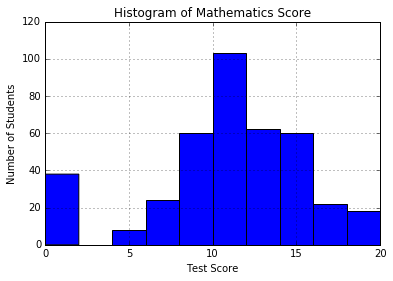

In [4]:
#ML_PROG_LogisticRegression Homework 

'''
Source:
http://archive.ics.uci.edu/ml/datasets/Student+Performance#


'This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, 
demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are 
provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por).'

Using data from this data set, I will attempt to build a model that will predict high student 
achievement and low student achievement based on dependent variable(target):

G3 - final grade (mathematics) (numeric: from 0 to 20, output target) - 
(High achievement being G3 > 15.0, given mean is 10.415, std deviation is 4.58)

And independent variables(attributes):

4 address - student's home address type (binary: 'U' - urban or 'R' - rural) 
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
16 schoolsup - extra educational support (binary: yes or no) 
17 famsup - family educational support (binary: yes or no) 
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 

Index is given as the school the students attend: 'GP' or 'MS'

This data set was chosen because there is much research that goes into improving student
performance, but many claim that student performance is closely related
to parent educational history and the student's family situation, i.e. rural areas being 
poorer with less access to educational resources, duties in taking care of other familiy
members in large families taking time from studying, whether or not the family can provide
education support (financially or otherwise), and quality of relationship with family. 

Educational support from the school is thought to offset these factors, so we will include it
to see if it makes a difference.

NOTE:   'yes' corrected to 1
        'no' corrrected to 0
        'GT3' corrected to 1
        'LE3' corrrected to 0
        'U' corrected to 1
        'R' corrrected to 0
        
'''
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.multiclass import OneVsRestClassifier

# read data into a DataFrame
data = pd.read_csv('student-mat.csv', delimiter=";", 
                usecols= ('G3','address','famsize','Medu','Fedu','schoolsup','famsup','paid','famrel'),
                index_col = False)

#print "Original data set: "
#print data

data = data.sort_values(['G3'], ascending = True)


#Massage the data to convert strings to ints
data['famsize'] = data['famsize'].replace('GT3',1)
data['famsize'] = data['famsize'].replace('LE3',0)
data['address'] = data['address'].replace('U',1)
data['address'] = data['address'].replace('R',0)
data['schoolsup'] = data['schoolsup'].replace('yes',1)
data['schoolsup'] = data['schoolsup'].replace('no',0)
data['famsup'] = data['famsup'].replace('yes',1)
data['famsup'] = data['famsup'].replace('no',0)
data['paid'] = data['paid'].replace('yes',1)
data['paid'] = data['paid'].replace('no',0)


#print "Modified data set: "
#print data
print "\nMean of score for mathematics: \t\t" ,data['G3'].mean()
print "Std deviation score for mathematics: \t" , data['G3'].std(), "\n"
print "High achievement will be described as a score of >=15"
print "Low achievement will be described as a score of <=6"




# histogram scores
%matplotlib inline
data.G3.hist()
#data.plot(y= 'G3', use_index = True )
#data.plot(kind='scatter', x='X2', y='X1', ax=axs[0], color = "red")
plt.title('Histogram of Mathematics Score')
plt.xlabel('Test Score')
plt.ylabel('Number of Students')




# Preparing Data (High Achievement)

In [5]:
data['high_achievement'] = (data.G3 >= 15.0).astype(int)
data.groupby('high_achievement').mean()


,address,famsize,Medu,Fedu,schoolsup,famsup,paid,famrel,G3
high_achievement,,,,,,,,,
0,0.757764,0.720497,2.642857,2.462733,0.152174,0.621118,0.462733,3.928571,9.099379
1,0.863014,0.671233,3.219178,2.780822,0.027397,0.575342,0.438356,4.013699,16.219178


# Logistic Regression (High Achievement) Accuracy and Error Rate

In [6]:
y, X = dmatrices('high_achievement ~ address + famsize + Medu + Fedu + schoolsup + famsup \
                 + paid + famrel',
                  data, return_type="dataframe")
y = np.ravel(y)
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
print "Accuracy of the model to predict high achievement: " , model.score(X, y)
print "Null Error rate: " , y.mean()

Accuracy of the model to predict high achievement:  0.815189873418
Null Error rate:  0.184810126582


# Examining Coefficients (High Achievement)

In [7]:
# examine the coefficients
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Intercept,[-1.30012524416]
1,address,[0.392039558354]
2,famsize,[-0.250146735398]
3,Medu,[0.497132221145]
4,Fedu,[-0.0224639351715]
5,schoolsup,[-1.2859175765]
6,famsup,[-0.264121539175]
7,paid,[-0.270140076642]
8,famrel,[-0.00115531897206]


# Model Evaluation with Training/Test Set (High Achievement)

# Training Set

In [8]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
model2 = LogisticRegression();
model2.fit(X_train, y_train);

# Test Set

In [9]:
# predict class labels for the test set
predicted = model2.predict(X_test);
#print predicted
# generate class probabilities
probs = model2.predict_proba(X_test)
#print probs

# ROC and Area Under the Curve

In [10]:
# generate evaluation metrics
print "Accuracy Score: ", metrics.accuracy_score(y_test, predicted)
print "ROC curve: \t", metrics.roc_auc_score(y_test, probs[:, 1])

Accuracy Score:  0.808080808081
ROC curve: 	0.591820987654


In [11]:
print metrics.confusion_matrix(y_test, predicted)
print metrics.classification_report(y_test, predicted)

[[160   2]
 [ 36   0]]
             precision    recall  f1-score   support

        0.0       0.82      0.99      0.89       162
        1.0       0.00      0.00      0.00        36

avg / total       0.67      0.81      0.73       198



# Prediciting Probability of High Achievement with New Data Points

In [12]:
X_pred = np.array([1,1,0,4,4,0,1,1,5]) #This represent a student's family situation
stu_prediction =  model2.predict_proba(X_pred.reshape(1,-1))
print "Given an urban student, with <3 family members, mother and father with high education, "\
    "family supplemental aid and great family relationships, there is a ", stu_prediction.item(1), \
    "% chance that the student will be high achieving."

Given an urban student, with <3 family members, mother and father with high education, family supplemental aid and great family relationships, there is a  0.24894015017 % chance that the student will be high achieving.


# Cross Validation High Achievement

In [13]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print "High Achievement model working with " ,scores.mean(), "% accuracy."

High Achievement model working with  0.815334584115 % accuracy.


#  Preparing Data (Low Achievement)

In [14]:
data.drop('high_achievement', axis=1, inplace=True)
data['low_achievement'] = (data.G3 <= 6.0).astype(int)
data.groupby('low_achievement').mean()



,address,famsize,Medu,Fedu,schoolsup,famsup,paid,famrel,G3
low_achievement,,,,,,,,,
0,0.787425,0.697605,2.796407,2.556886,0.125749,0.601796,0.491018,3.961078,11.931138
1,0.721311,0.786885,2.491803,2.327869,0.147541,0.672131,0.278689,3.852459,2.114754


# Logistic Regression (Low Achievement) Accuracy and Error Rate

In [424]:
y, X = dmatrices('low_achievement ~ address + famsize + Medu + Fedu + schoolsup + famsup \
                 + paid + famrel',
                  data, return_type="dataframe")
y = np.ravel(y)
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
print "Accuracy of the model to predict low achievement: " , model.score(X, y)
print "Null Error rate: " , y.mean()

Accuracy of the model to predict low achievement:  0.845569620253
Null Error rate:  0.154430379747


# Examining Coefficients (Low Achievement)

In [425]:
# examine the coefficients
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Intercept,[-0.250292539929]
1,address,[-0.196983696119]
2,famsize,[0.400234469571]
3,Medu,[-0.190672861148]
4,Fedu,[-0.106961807095]
5,schoolsup,[0.0611573678507]
6,famsup,[0.599147503863]
7,paid,[-0.932817200179]
8,famrel,[-0.154430235531]


# Model Evaluation with Training/Test Set (Low Achievement)

# Training Set

In [426]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
model2 = LogisticRegression();
model2.fit(X_train, y_train);

# Test Set

In [427]:
# predict class labels for the test set
predicted = model2.predict(X_test);
#print predicted
# generate class probabilities
probs = model2.predict_proba(X_test)
#print probs

# ROC and Area Under the Curve

In [428]:
# generate evaluation metrics
print "Accuracy Score: ", metrics.accuracy_score(y_test, predicted)
print "ROC curve: \t", metrics.roc_auc_score(y_test, probs[:, 1])

Accuracy Score:  0.848484848485
ROC curve: 	0.59375


In [429]:
print metrics.confusion_matrix(y_test, predicted)
print metrics.classification_report(y_test, predicted)

[[168   0]
 [ 30   0]]
             precision    recall  f1-score   support

        0.0       0.85      1.00      0.92       168
        1.0       0.00      0.00      0.00        30

avg / total       0.72      0.85      0.78       198



# Predicting Probability of Low Achievement with New Data Points

In [430]:
X_pred = np.array([1,0,1,1,1,0,0,0,1]) #This represent a student's family situation
stu_prediction =  model2.predict_proba(X_pred.reshape(1,-1))
print "Given a rural student, with 3+ family members, mother and father with basic education, "\
    "no supplemental aid and bad family relationships, there is a ", stu_prediction.item(1), \
    "% chance that the student will be low achieving."

Given a rural student, with 3+ family members, mother and father with basic education, no supplemental aid and bad family relationships, there is a  0.25908554852 % chance that the student will be low achieving.


# Cross Validation (Low Achievement)

In [431]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print "Low Achievement model working with " ,scores.mean(), "% accuracy."

Low Achievement model working with  0.845619136961 % accuracy.
